## Perbandingan Metode Klasifikasi Data menggunakan Dataset Penguin

In [1]:
# Library Utama
import pandas as pd
import numpy as np

pd.set_option('display.max_columns', None)
pd.set_option('display.width', 1000)

import matplotlib.pyplot as plt
import seaborn as sns


# Library Preprocessing Data
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split

# Library Supervised Learning
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC


from sklearn.preprocessing import StandardScaler
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn import datasets, decomposition
import mpl_toolkits.mplot3d
from sklearn.decomposition import PCA

# Library Evaluation Model
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

### 1. Akuisisi Data

In [2]:
dataset = sns.load_dataset("penguins")
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 344 entries, 0 to 343
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   species            344 non-null    object 
 1   island             344 non-null    object 
 2   bill_length_mm     342 non-null    float64
 3   bill_depth_mm      342 non-null    float64
 4   flipper_length_mm  342 non-null    float64
 5   body_mass_g        342 non-null    float64
 6   sex                333 non-null    object 
dtypes: float64(4), object(3)
memory usage: 18.9+ KB


In [3]:
print(dataset)

    species     island  bill_length_mm  bill_depth_mm  flipper_length_mm  body_mass_g     sex
0    Adelie  Torgersen            39.1           18.7              181.0       3750.0    Male
1    Adelie  Torgersen            39.5           17.4              186.0       3800.0  Female
2    Adelie  Torgersen            40.3           18.0              195.0       3250.0  Female
3    Adelie  Torgersen             NaN            NaN                NaN          NaN     NaN
4    Adelie  Torgersen            36.7           19.3              193.0       3450.0  Female
..      ...        ...             ...            ...                ...          ...     ...
339  Gentoo     Biscoe             NaN            NaN                NaN          NaN     NaN
340  Gentoo     Biscoe            46.8           14.3              215.0       4850.0  Female
341  Gentoo     Biscoe            50.4           15.7              222.0       5750.0    Male
342  Gentoo     Biscoe            45.2           14.8       

### 2. Praproses Data

In [4]:
dataset.isna().sum()

species               0
island                0
bill_length_mm        2
bill_depth_mm         2
flipper_length_mm     2
body_mass_g           2
sex                  11
dtype: int64

In [5]:
dataset = dataset.bfill()
print(dataset)

    species     island  bill_length_mm  bill_depth_mm  flipper_length_mm  body_mass_g     sex
0    Adelie  Torgersen            39.1           18.7              181.0       3750.0    Male
1    Adelie  Torgersen            39.5           17.4              186.0       3800.0  Female
2    Adelie  Torgersen            40.3           18.0              195.0       3250.0  Female
3    Adelie  Torgersen            36.7           19.3              193.0       3450.0  Female
4    Adelie  Torgersen            36.7           19.3              193.0       3450.0  Female
..      ...        ...             ...            ...                ...          ...     ...
339  Gentoo     Biscoe            46.8           14.3              215.0       4850.0  Female
340  Gentoo     Biscoe            46.8           14.3              215.0       4850.0  Female
341  Gentoo     Biscoe            50.4           15.7              222.0       5750.0    Male
342  Gentoo     Biscoe            45.2           14.8       

In [6]:
dataset.isna().sum()

species              0
island               0
bill_length_mm       0
bill_depth_mm        0
flipper_length_mm    0
body_mass_g          0
sex                  0
dtype: int64

### 3. Eksplorasi Data Analisis

- Cek unique value

In [7]:
dataset["species"].unique()

array(['Adelie', 'Chinstrap', 'Gentoo'], dtype=object)

In [8]:
dataset["island"].unique()

array(['Torgersen', 'Biscoe', 'Dream'], dtype=object)

- Visualisasi Data

In [9]:
df = dataset["species"].value_counts().reset_index(name="jumlah")
df

,species,jumlah
0,Adelie,152
1,Gentoo,124
2,Chinstrap,68


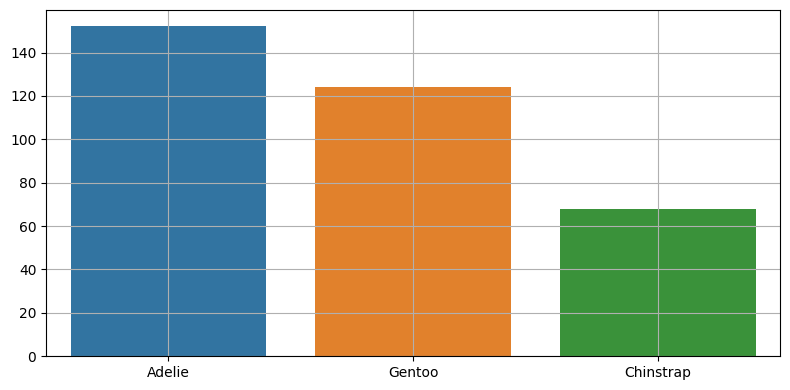

In [10]:
fig, ax = plt.subplots(figsize=(8,4))
sns.barplot(data=df, x="species", y="jumlah", hue="species")

ax.set_title("", fontsize=14)
ax.set_xlabel("", fontsize=12)
ax.set_ylabel("", fontsize=12)
ax.grid(True)

plt.tight_layout()
plt.show()

In [11]:
df = dataset["island"].value_counts().reset_index(name="jumlah")
df

,island,jumlah
0,Biscoe,168
1,Dream,124
2,Torgersen,52


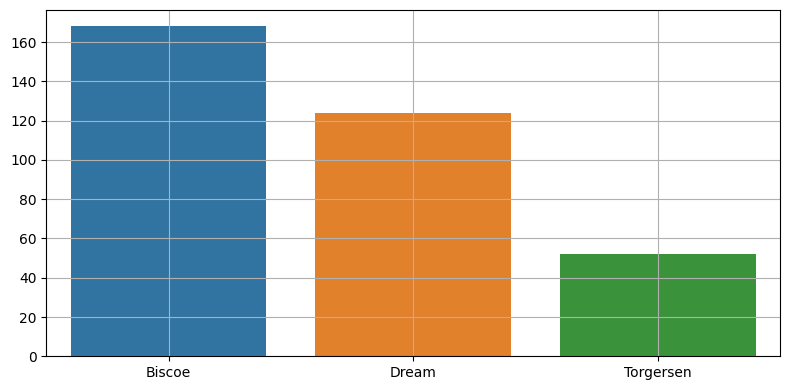

In [12]:
fig, ax = plt.subplots(figsize=(8,4))
sns.barplot(data=df, x="island", y="jumlah", hue="island")

ax.set_title("", fontsize=14)
ax.set_xlabel("", fontsize=12)
ax.set_ylabel("", fontsize=12)
ax.grid(True)

plt.tight_layout()
plt.show()

### 4. Pembagian Data

- Set variabel bebas dan variabel terikat

In [13]:
x = dataset[["bill_length_mm", "bill_depth_mm", "flipper_length_mm", "body_mass_g"]].values
y = dataset["species"]

- Normalisasi data

In [14]:
Scaler = MinMaxScaler(feature_range=(0,1))
Scaled = Scaler.fit_transform(x)

- Split validasi

In [15]:
TrainX, TestX, TrainY, TestY = train_test_split(
    Scaled, y, train_size=0.8, test_size=0.2, random_state=7, shuffle=True
)

- Dimensi data train

In [16]:
print(TrainX.shape, TrainY.shape)

(275, 4) (275,)


In [17]:
print(TestX.shape, TestY.shape)

(69, 4) (69,)


### 5. Modelling Klasifikasi Algoritma

- Support Vector Classifier

In [18]:
Result_SVC = SVC(kernel='rbf').fit(TrainX, TrainY).predict(TestX)
Result_SVC

array(['Chinstrap', 'Adelie', 'Adelie', 'Gentoo', 'Adelie', 'Chinstrap',
       'Gentoo', 'Gentoo', 'Chinstrap', 'Adelie', 'Adelie', 'Chinstrap',
       'Adelie', 'Chinstrap', 'Adelie', 'Gentoo', 'Gentoo', 'Chinstrap',
       'Adelie', 'Adelie', 'Adelie', 'Gentoo', 'Chinstrap', 'Gentoo',
       'Gentoo', 'Adelie', 'Gentoo', 'Chinstrap', 'Chinstrap',
       'Chinstrap', 'Adelie', 'Adelie', 'Gentoo', 'Gentoo', 'Gentoo',
       'Gentoo', 'Gentoo', 'Gentoo', 'Gentoo', 'Gentoo', 'Chinstrap',
       'Gentoo', 'Gentoo', 'Adelie', 'Adelie', 'Chinstrap', 'Gentoo',
       'Gentoo', 'Adelie', 'Adelie', 'Chinstrap', 'Adelie', 'Adelie',
       'Adelie', 'Adelie', 'Gentoo', 'Adelie', 'Adelie', 'Adelie',
       'Gentoo', 'Adelie', 'Adelie', 'Gentoo', 'Adelie', 'Gentoo',
       'Adelie', 'Gentoo', 'Adelie', 'Gentoo'], dtype=object)

In [19]:
print(confusion_matrix(TestY, Result_SVC))

[[28  2  0]
 [ 1 11  0]
 [ 0  0 27]]


In [20]:
print("Akurasi  : ", np.round(accuracy_score(TestY, Result_SVC), 2))
print("Presisi  : ", np.round(precision_score(TestY, Result_SVC, average='macro'), 2))
print("Recall   : ", np.round(recall_score(TestY, Result_SVC, average='macro'), 2))
print("F1-Score : ", np.round(f1_score(TestY, Result_SVC, average='macro'), 2))

Akurasi  :  0.96
Presisi  :  0.94
Recall   :  0.95
F1-Score :  0.94


In [21]:
print(classification_report(TestY, Result_SVC))

              precision    recall  f1-score   support

      Adelie       0.97      0.93      0.95        30
   Chinstrap       0.85      0.92      0.88        12
      Gentoo       1.00      1.00      1.00        27

    accuracy                           0.96        69
   macro avg       0.94      0.95      0.94        69
weighted avg       0.96      0.96      0.96        69



- Logistik Regresi

In [22]:
Result_LR = LogisticRegression(max_iter=1000).fit(TrainX, TrainY).predict(TestX)
Result_LR

array(['Chinstrap', 'Adelie', 'Adelie', 'Gentoo', 'Adelie', 'Adelie',
       'Gentoo', 'Gentoo', 'Chinstrap', 'Adelie', 'Adelie', 'Chinstrap',
       'Adelie', 'Chinstrap', 'Adelie', 'Gentoo', 'Gentoo', 'Adelie',
       'Adelie', 'Adelie', 'Adelie', 'Gentoo', 'Chinstrap', 'Gentoo',
       'Gentoo', 'Adelie', 'Gentoo', 'Chinstrap', 'Chinstrap', 'Adelie',
       'Adelie', 'Adelie', 'Gentoo', 'Gentoo', 'Gentoo', 'Gentoo',
       'Gentoo', 'Gentoo', 'Gentoo', 'Gentoo', 'Chinstrap', 'Gentoo',
       'Gentoo', 'Adelie', 'Adelie', 'Chinstrap', 'Gentoo', 'Gentoo',
       'Adelie', 'Adelie', 'Chinstrap', 'Adelie', 'Adelie', 'Adelie',
       'Adelie', 'Gentoo', 'Adelie', 'Adelie', 'Adelie', 'Gentoo',
       'Adelie', 'Adelie', 'Gentoo', 'Adelie', 'Gentoo', 'Adelie',
       'Gentoo', 'Adelie', 'Gentoo'], dtype=object)

In [23]:
print(confusion_matrix(TestY, Result_LR))

[[30  0  0]
 [ 2 10  0]
 [ 0  0 27]]


In [24]:
print("Akurasi  : ", np.round(accuracy_score(TestY, Result_LR), 2))
print("Presisi  : ", np.round(precision_score(TestY, Result_LR, average='macro'), 2))
print("Recall   : ", np.round(recall_score(TestY, Result_LR, average='macro'), 2))
print("F1-Score : ", np.round(f1_score(TestY, Result_LR, average='macro'), 2))

Akurasi  :  0.97
Presisi  :  0.98
Recall   :  0.94
F1-Score :  0.96


In [25]:
print(classification_report(TestY, Result_LR))

              precision    recall  f1-score   support

      Adelie       0.94      1.00      0.97        30
   Chinstrap       1.00      0.83      0.91        12
      Gentoo       1.00      1.00      1.00        27

    accuracy                           0.97        69
   macro avg       0.98      0.94      0.96        69
weighted avg       0.97      0.97      0.97        69



- QDA

In [26]:
Result_QDA = QuadraticDiscriminantAnalysis(priors=None, reg_param=0.0, tol=0.0001).fit(TrainX, TrainY).predict(TestX)
Result_QDA


array(['Chinstrap', 'Adelie', 'Adelie', 'Gentoo', 'Adelie', 'Chinstrap',
       'Gentoo', 'Gentoo', 'Chinstrap', 'Adelie', 'Adelie', 'Chinstrap',
       'Adelie', 'Chinstrap', 'Adelie', 'Gentoo', 'Gentoo', 'Chinstrap',
       'Adelie', 'Adelie', 'Adelie', 'Gentoo', 'Chinstrap', 'Gentoo',
       'Gentoo', 'Adelie', 'Gentoo', 'Chinstrap', 'Chinstrap',
       'Chinstrap', 'Adelie', 'Adelie', 'Gentoo', 'Gentoo', 'Gentoo',
       'Gentoo', 'Gentoo', 'Gentoo', 'Gentoo', 'Gentoo', 'Chinstrap',
       'Gentoo', 'Gentoo', 'Adelie', 'Adelie', 'Chinstrap', 'Gentoo',
       'Gentoo', 'Adelie', 'Adelie', 'Chinstrap', 'Adelie', 'Chinstrap',
       'Adelie', 'Adelie', 'Gentoo', 'Adelie', 'Adelie', 'Adelie',
       'Gentoo', 'Adelie', 'Adelie', 'Gentoo', 'Adelie', 'Gentoo',
       'Adelie', 'Gentoo', 'Adelie', 'Gentoo'], dtype=object)

In [27]:
print(confusion_matrix(TestY, Result_QDA))

[[28  2  0]
 [ 0 12  0]
 [ 0  0 27]]


In [28]:
print("Akurasi  : ", np.round(accuracy_score(TestY, Result_QDA), 2))
print("Presisi  : ", np.round(precision_score(TestY, Result_QDA, average='macro'), 2))
print("Recall   : ", np.round(recall_score(TestY, Result_QDA, average='macro'), 2))
print("F1-Score : ", np.round(f1_score(TestY, Result_QDA, average='macro'), 2))

Akurasi  :  0.97
Presisi  :  0.95
Recall   :  0.98
F1-Score :  0.96


In [29]:
print(classification_report(TestY, Result_QDA))

              precision    recall  f1-score   support

      Adelie       1.00      0.93      0.97        30
   Chinstrap       0.86      1.00      0.92        12
      Gentoo       1.00      1.00      1.00        27

    accuracy                           0.97        69
   macro avg       0.95      0.98      0.96        69
weighted avg       0.98      0.97      0.97        69



- LDA

In [30]:
Result_LDA = LinearDiscriminantAnalysis(n_components=None, priors=None, shrinkage=None, solver='svd', store_covariance=False, tol=0.0001).fit(TrainX, TrainY).predict(TestX)
Result_LDA

array(['Chinstrap', 'Adelie', 'Adelie', 'Gentoo', 'Adelie', 'Chinstrap',
       'Gentoo', 'Gentoo', 'Chinstrap', 'Adelie', 'Adelie', 'Chinstrap',
       'Adelie', 'Chinstrap', 'Adelie', 'Gentoo', 'Gentoo', 'Chinstrap',
       'Adelie', 'Adelie', 'Adelie', 'Gentoo', 'Chinstrap', 'Gentoo',
       'Gentoo', 'Adelie', 'Gentoo', 'Chinstrap', 'Chinstrap',
       'Chinstrap', 'Adelie', 'Adelie', 'Gentoo', 'Gentoo', 'Gentoo',
       'Gentoo', 'Gentoo', 'Gentoo', 'Gentoo', 'Gentoo', 'Chinstrap',
       'Gentoo', 'Gentoo', 'Adelie', 'Adelie', 'Chinstrap', 'Gentoo',
       'Gentoo', 'Adelie', 'Adelie', 'Chinstrap', 'Adelie', 'Adelie',
       'Adelie', 'Adelie', 'Gentoo', 'Adelie', 'Adelie', 'Adelie',
       'Gentoo', 'Adelie', 'Adelie', 'Gentoo', 'Adelie', 'Gentoo',
       'Adelie', 'Gentoo', 'Adelie', 'Gentoo'], dtype='<U9')

In [31]:
print(confusion_matrix(TestY, Result_LDA))

[[28  2  0]
 [ 1 11  0]
 [ 0  0 27]]


In [32]:
print(classification_report(TestY, Result_LDA))

              precision    recall  f1-score   support

      Adelie       0.97      0.93      0.95        30
   Chinstrap       0.85      0.92      0.88        12
      Gentoo       1.00      1.00      1.00        27

    accuracy                           0.96        69
   macro avg       0.94      0.95      0.94        69
weighted avg       0.96      0.96      0.96        69



In [33]:
print("Akurasi  : ", np.round(accuracy_score(TestY, Result_LDA), 2))
print("Presisi  : ", np.round(precision_score(TestY, Result_LDA, average='macro'), 2))
print("Recall   : ", np.round(recall_score(TestY, Result_LDA, average='macro'), 2))
print("F1-Score : ", np.round(f1_score(TestY, Result_LDA, average='macro'), 2))

Akurasi  :  0.96
Presisi  :  0.94
Recall   :  0.95
F1-Score :  0.94


- PCA

In [34]:
Result_PCA = decomposition.PCA(n_components=3).fit(TrainX, TrainY)
Result_PCA

PCA(n_components=3)

In [35]:
Result_PCA = PCA(n_components=3)
Result_PCA.fit_transform(Scaled)


array([[-0.42110787,  0.00252093, -0.05068292],
       [-0.28799804, -0.10655293, -0.01765112],
       [-0.29808507, -0.04772122,  0.03486313],
       ...,
       [ 0.61484456,  0.10318046, -0.07692548],
       [ 0.40535821, -0.13122009, -0.06929466],
       [ 0.44151929,  0.09734021, -0.02097907]])

In [36]:
print(Result_PCA.components_)

[[ 0.37657817 -0.44256665  0.60945936  0.53933564]
 [ 0.50958753  0.82893388  0.10565847  0.20500111]
 [ 0.75455641 -0.30304864 -0.20380223 -0.54522545]]


In [37]:
print(sum(Result_PCA.explained_variance_ratio_))

0.9710661433451703


In [38]:
nums = np.arange(5)

var_ratio = []
for num in nums:
  Result_PCA = PCA(n_components=num)
  Result_PCA.fit(Scaled)
  var_ratio.append(np.sum(Result_PCA.explained_variance_ratio_))

Text(0.5, 1.0, 'n_components vs. Explained Variance Ratio')

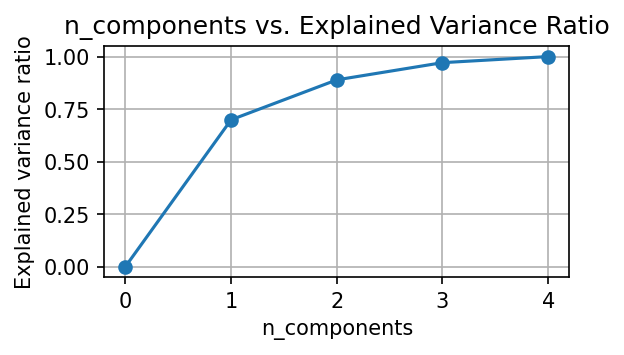

In [39]:
plt.figure(figsize=(4,2),dpi=150)
plt.grid()
plt.plot(nums,var_ratio,marker='o')
plt.xlabel('n_components')
plt.ylabel('Explained variance ratio')
plt.title('n_components vs. Explained Variance Ratio')

##### Dengan from sklearn.decomposition import PCA

In [40]:
std_scaler = StandardScaler()
scaled_df = std_scaler.fit_transform(x)

In [41]:
Result_PCA = PCA(n_components=3)
Result_PCA.fit_transform(scaled_df)


array([[-1.84371334,  0.04709043, -0.22698769],
       [-1.30669788, -0.4274377 , -0.02513892],
       [-1.36937532, -0.15437764,  0.20063129],
       ...,
       [ 2.76126088,  0.29491033, -0.431288  ],
       [ 1.72308811, -0.6985057 , -0.27799588],
       [ 2.02938143,  0.3627748 , -0.16391376]])

In [42]:
print(Result_PCA.components_)

[[ 0.45542891 -0.40164582  0.57529477  0.54799732]
 [ 0.59774666  0.7971729   0.00247627  0.0849009 ]
 [ 0.64405479 -0.41878586 -0.23503752 -0.59545712]]


In [43]:
print(sum(Result_PCA.explained_variance_ratio_))

0.9728278236076324


In [44]:
nums = np.arange(5)

var_ratio = []
for num in nums:
  Result_PCA = PCA(n_components=num)
  Result_PCA.fit(Scaled)
  var_ratio.append(np.sum(Result_PCA.explained_variance_ratio_))

Text(0.5, 1.0, 'n_components vs. Explained Variance Ratio')

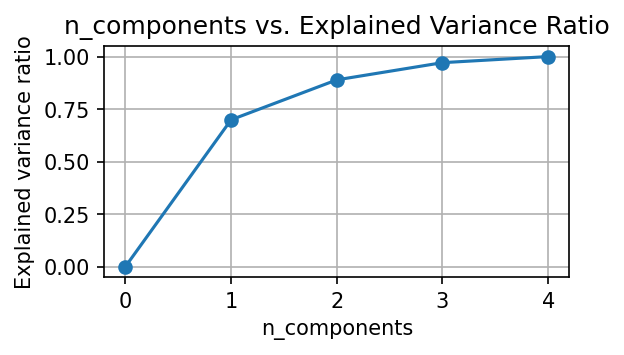

In [45]:
plt.figure(figsize=(4,2),dpi=150)
plt.grid()
plt.plot(nums,var_ratio,marker='o')
plt.xlabel('n_components')
plt.ylabel('Explained variance ratio')
plt.title('n_components vs. Explained Variance Ratio')